In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# Load the dataset
file_path = "ml_drawing_skill_improvement.csv"
df = pd.read_csv(file_path)

df.head()

,Image_ID,Propotion_Accuracy,Line_Accuracy,Shadin_Quality,Completion_Time,Task_Type
0,IMG_0001,0.812362,0.821247,0.713920,18.689087,Tracing
1,IMG_0002,0.985214,0.918447,0.979397,14.572020,Sketching
2,IMG_0003,0.919598,0.938608,0.814268,15.002826,Sketching
3,IMG_0004,0.879598,0.910127,0.932801,15.763992,Shading
4,IMG_0005,0.746806,0.774795,0.752576,18.310713,Tracing


In [16]:
# Data Preprocessing
# Encode Task_Type
label_encoder = LabelEncoder()
df['Task_Type_Encoded'] = label_encoder.fit_transform(df['Task_Type'])

In [17]:
# Feature and target separation
X = df[['Propotion_Accuracy', 'Line_Accuracy', 'Shadin_Quality', 'Completion_Time']]
y = df['Task_Type_Encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [18]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models to train
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [19]:
# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": accuracy})

In [20]:
# the best model
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

C:\Users\Ash\AppData\Local\Temp\ipykernel_2680\2993035593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Accuracy", palette="viridis")


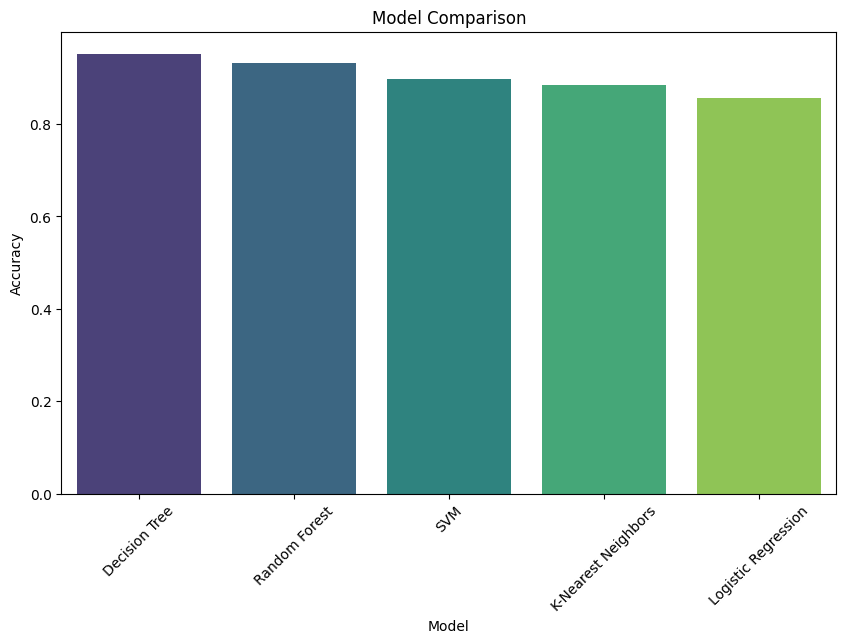

In [21]:
# Visualize model performance
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="Accuracy", palette="viridis")
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

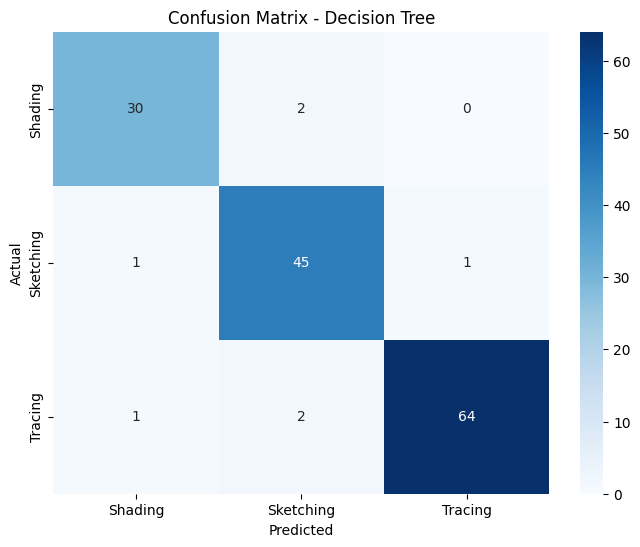

In [22]:
# Confusion Matrix for the best model
best_model.fit(X_train_scaled, y_train)
y_pred_best = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
# Classification Report for the best model
print(f"Classification Report - {best_model_name}")
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))

Classification Report - Decision Tree
              precision    recall  f1-score   support

     Shading       0.94      0.94      0.94        32
   Sketching       0.92      0.96      0.94        47
     Tracing       0.98      0.96      0.97        67

    accuracy                           0.95       146
   macro avg       0.95      0.95      0.95       146
weighted avg       0.95      0.95      0.95       146



In [24]:
import joblib

# Save the best model
model_file_path = "best_model.pkl"
joblib.dump(best_model, model_file_path)
print(f"Best model saved to {model_file_path}")

Best model saved to best_model.pkl


In [25]:
# Load the best model
loaded_model = joblib.load(model_file_path)
print(f"Best model loaded from {model_file_path}")

Best model loaded from best_model.pkl


In [26]:
new_data = np.array([[0.9, 0.85, 0.8, 20]])
new_data_scaled = scaler.transform(new_data)
predicted_class = loaded_model.predict(new_data_scaled)
predicted_task_type = label_encoder.inverse_transform(predicted_class)
print(f"Predicted Task Type: {predicted_task_type[0]}")

Predicted Task Type: Sketching


c:\Users\Ash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
